UBER : Data Science - Insights from City Supply and Demand Data

PART 1 : DATA EXPLORATION

In [54]:
import pandas as pd

In [56]:
df= pd.read_csv('/Users/adyashamohapatra/Desktop/Data Science Projects/UBER_Ride_Demand.csv')

In [58]:
df.head()

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,NaN,8,6,0,2,2,14
2,NaN,9,8,3,0,0,14
3,NaN,10,9,2,0,1,14
4,NaN,11,11,1,4,4,11


In [60]:
df.describe()

,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
count,336.00000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,11.50000,19.901786,4.252976,4.062500,5.529762,7.895833
std,6.93251,16.902862,5.795391,5.672581,7.399416,5.884296
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.75000,9.000000,1.000000,0.000000,1.000000,3.000000
50%,11.50000,17.000000,3.000000,2.000000,3.000000,8.000000
75%,17.25000,25.000000,5.000000,5.000000,6.250000,11.000000
max,23.00000,99.000000,59.000000,36.000000,46.000000,30.000000


In [62]:
df.shape

(336, 7)

In [64]:
df.columns

Index(['Date', 'Time (Local)', 'Eyeballs ', 'Zeroes ', 'Completed Trips ',
       'Requests ', 'Unique Drivers'],
      dtype='object')

In [66]:
import numpy as np

1 : Which date had the most completed trips during the two week period?

In [69]:
# forward fill empty Dates
df = df.ffill()
df

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,10-Sep-12,8,6,0,2,2,14
2,10-Sep-12,9,8,3,0,0,14
3,10-Sep-12,10,9,2,0,1,14
4,10-Sep-12,11,11,1,4,4,11
...,...,...,...,...,...,...,...
331,24-Sep-12,2,3,3,0,2,0
332,24-Sep-12,3,3,3,0,1,0
333,24-Sep-12,4,1,1,0,0,0
334,24-Sep-12,5,4,2,1,1,3


In [71]:
# aggregate on Date since the question asks the completed trips by Date
df_agg_date = df.groupby('Date').sum().reset_index()

In [73]:
df_agg_date.nlargest(1, 'Completed Trips ')

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
12,22-Sep-12,276,960,219,248,344,292


In [75]:
df_agg_date.nlargest(1, 'Completed Trips ')['Date']

12    22-Sep-12
Name: Date, dtype: object

2: What was the highest number of completed trips within a 24 hour period?

In [80]:
daily_completed_trips = df.groupby('Date').sum().reset_index()

In [82]:
daily_completed_trips.nlargest(1, 'Completed Trips ')

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
12,22-Sep-12,276,960,219,248,344,292


In [84]:
df_agg_date.nlargest(1, 'Completed Trips ')['Completed Trips ']

12    248
Name: Completed Trips , dtype: int64

3 : Which hour of the day had the most requests during the two week period?

In [87]:
# aggregate on hour
df_agg_time = df.groupby('Time (Local)').sum().reset_index()
df_agg_time.nlargest(1, 'Requests ')

,Time (Local),Date,Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
23,23,10-Sep-1211-Sep-1212-Sep-1213-Sep-1214-Sep-121...,488,193,126,184,119


In [89]:
df_agg_time.nlargest(1, 'Requests ')['Time (Local)']

23    23
Name: Time (Local), dtype: int64

4 : What percentages of all zeroes during the two week period occurred on weekend (Friday at 5 pm to Sunday at 3 am)?

Tip: The local time value is the start of the hour (e.g. 15 is the hour from 3:00pm - 4:00pm)

In [92]:
# all zeroes in the dataset
total_zeroes = df['Zeroes '].sum()
total_zeroes

1429

In [94]:
# all zeroes in weekend based on given condition
df['Day'] = pd.to_datetime(df['Date']).dt.dayofweek
weekend_zeroes = df[((df['Day'] == 4) & (df['Time (Local)'] >= 17)) 
                          | (df['Day'] == 5) |
                          ((df['Day'] == 6) & (df['Time (Local)'] < 3))]['Zeroes '].sum()
weekend_zeroes

/var/folders/vt/txkkqyqd0sd4mndt_bc961yw0000gn/T/ipykernel_13683/1450385096.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Day'] = pd.to_datetime(df['Date']).dt.dayofweek


641

In [96]:
# calculate the percentage
weekend_zeroes_pct = weekend_zeroes / total_zeroes * 100
print(weekend_zeroes_pct,'%')

44.856543037088876 %


5 : What is the weighted average ratio of completed trips per driver during the two week period?

In [99]:
# calculate the ratio
df['completed_trip_ratio_per_driver'] = df['Completed Trips '] / df['Unique Drivers']
df

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Day,completed_trip_ratio_per_driver
0,10-Sep-12,7,5,0,2,2,9,0,0.222222
1,10-Sep-12,8,6,0,2,2,14,0,0.142857
2,10-Sep-12,9,8,3,0,0,14,0,0.000000
3,10-Sep-12,10,9,2,0,1,14,0,0.000000
4,10-Sep-12,11,11,1,4,4,11,0,0.363636
...,...,...,...,...,...,...,...,...,...
331,24-Sep-12,2,3,3,0,2,0,0,NaN
332,24-Sep-12,3,3,3,0,1,0,0,NaN
333,24-Sep-12,4,1,1,0,0,0,0,NaN
334,24-Sep-12,5,4,2,1,1,3,0,0.333333


In [101]:
# drop rows with nan 
dataset_without_zero_unique_driver = df[df['Unique Drivers'] > 0]
# calculate weighted average by giving weight as day's completed trip ratio all completed trips
weighted_average_ratio = np.average(dataset_without_zero_unique_driver['completed_trip_ratio_per_driver'], weights=dataset_without_zero_unique_driver['Completed Trips '])
weighted_average_ratio

0.8282775715092395

In [103]:
# check it is not same with normal average
np.average(dataset_without_zero_unique_driver['completed_trip_ratio_per_driver'])

0.4743397876937869

6: In drafting a driver schedule in terms of 8 hours shifts, when are the busiest 8 consecutive hours over the two week period in terms of unique requests? A new shift starts in every 8 hours. Assume that a driver will work same shift each day.

In [116]:
# Group by hour only and sum requests across all days
requests_by_hour = df.groupby(df['Time (Local)'])['Requests '].sum()

# Get the peak request hour
max_request_hour = requests_by_hour.idxmax()

print(f"Hour with most total requests: {max_request_hour}:00")


Hour with most total requests: 23:00


7 : True or False: Driver supply always increases when demand increases during the two week period.

In [119]:
# create empty dataframe with only timestamps
difference_df = pd.DataFrame(df['Time (Local)'])
# calculate request differences to catch request increases
difference_df['request_diff'] = df['Requests '].shift(-1) - df['Requests ']
# do same of supply side
difference_df['supply_diff'] = df['Unique Drivers'].shift(-1) - df['Unique Drivers']
difference_df

,Time (Local),request_diff,supply_diff
0,7,0.0,5.0
1,8,-2.0,0.0
2,9,1.0,0.0
3,10,3.0,-3.0
4,11,-2.0,0.0
...,...,...,...
331,2,-1.0,0.0
332,3,-1.0,0.0
333,4,1.0,3.0
334,5,1.0,4.0


In [121]:
# check if request increases, supply also increases 
(difference_df[difference_df['request_diff'] > 0]['supply_diff'] > 0).all().item()

False

Matplotlib is building the font cache; this may take a moment.


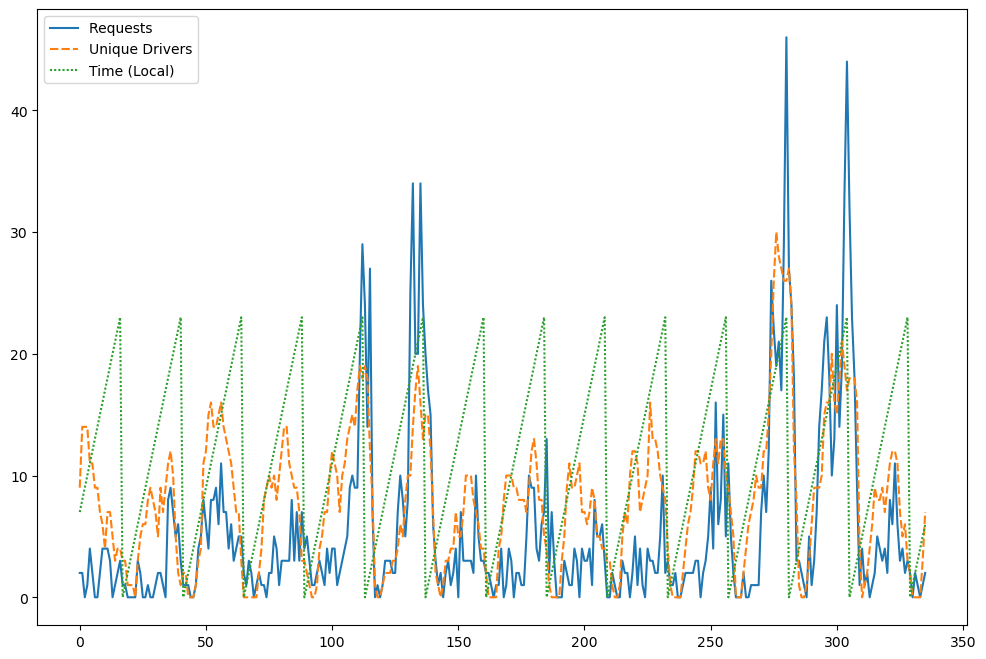

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.lineplot(data=df[['Requests ', 'Unique Drivers', 'Time (Local)']])
plt.show()

9 : If you could add 5 drivers to any single hour of every day during the two week period, which hour should you add them to?

In [131]:
df_agg_time = df.groupby('Time (Local)').sum().reset_index()
df_agg_time['eyeball_to_driver_ratio'] = df_agg_time['Eyeballs '] / df_agg_time['Unique Drivers'] 
df_agg_time.nlargest(1, 'eyeball_to_driver_ratio')

,Time (Local),Date,Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Day,completed_trip_ratio_per_driver,eyeball_to_driver_ratio
23,23,10-Sep-1211-Sep-1212-Sep-1213-Sep-1214-Sep-121...,488,193,126,184,119,42,11.269306,4.10084


In [133]:
df_agg_time.nlargest(1, 'eyeball_to_driver_ratio')['Time (Local)']

23    23
Name: Time (Local), dtype: int64

11: Looking at the data from all two weeks, which time might make the most sense to consider a true "end day" instead of midnight? (i.e when are supply and demand at both their natural minimums)

In [136]:
# find min supply and demand per day
df_min_supply_per_day = df.groupby(['Date'])['Unique Drivers'].min().reset_index().rename(columns={'Unique Drivers':'min_supply_per_day'})
df_min_demand_per_day = df.groupby(['Date'])['Requests '].min().reset_index().rename(columns={'Requests ':'min_demand_per_day'})

# merge demand and supply based on date
supply_demand = pd.merge(df_min_supply_per_day, df_min_demand_per_day, on="Date")
supply_demand

,Date,min_supply_per_day,min_demand_per_day
0,10-Sep-12,3,0
1,11-Sep-12,0,0
2,12-Sep-12,0,0
3,13-Sep-12,0,0
4,14-Sep-12,0,1
5,15-Sep-12,0,0
6,16-Sep-12,0,0
7,17-Sep-12,0,0
8,18-Sep-12,0,0
9,19-Sep-12,0,0


In [138]:
# merge found min values with initial dataset on Date
dataset_w_min_supply_demand = pd.merge(df, supply_demand, on="Date")
dataset_w_min_supply_demand

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Day,completed_trip_ratio_per_driver,min_supply_per_day,min_demand_per_day
0,10-Sep-12,7,5,0,2,2,9,0,0.222222,3,0
1,10-Sep-12,8,6,0,2,2,14,0,0.142857,3,0
2,10-Sep-12,9,8,3,0,0,14,0,0.000000,3,0
3,10-Sep-12,10,9,2,0,1,14,0,0.000000,3,0
4,10-Sep-12,11,11,1,4,4,11,0,0.363636,3,0
...,...,...,...,...,...,...,...,...,...,...,...
331,24-Sep-12,2,3,3,0,2,0,0,NaN,0,0
332,24-Sep-12,3,3,3,0,1,0,0,NaN,0,0
333,24-Sep-12,4,1,1,0,0,0,0,NaN,0,0
334,24-Sep-12,5,4,2,1,1,3,0,0.333333,0,0


In [140]:
# check the exact matches with natural minimums
min_point = dataset_w_min_supply_demand[(dataset_w_min_supply_demand.min_supply_per_day == dataset_w_min_supply_demand['Unique Drivers']) & 
                           (dataset_w_min_supply_demand.min_demand_per_day == dataset_w_min_supply_demand['Requests '])]['Time (Local)'].mode()
min_point

0    4
Name: Time (Local), dtype: int64

In [142]:
# minimum hour is 4 am
min_point[0]

4

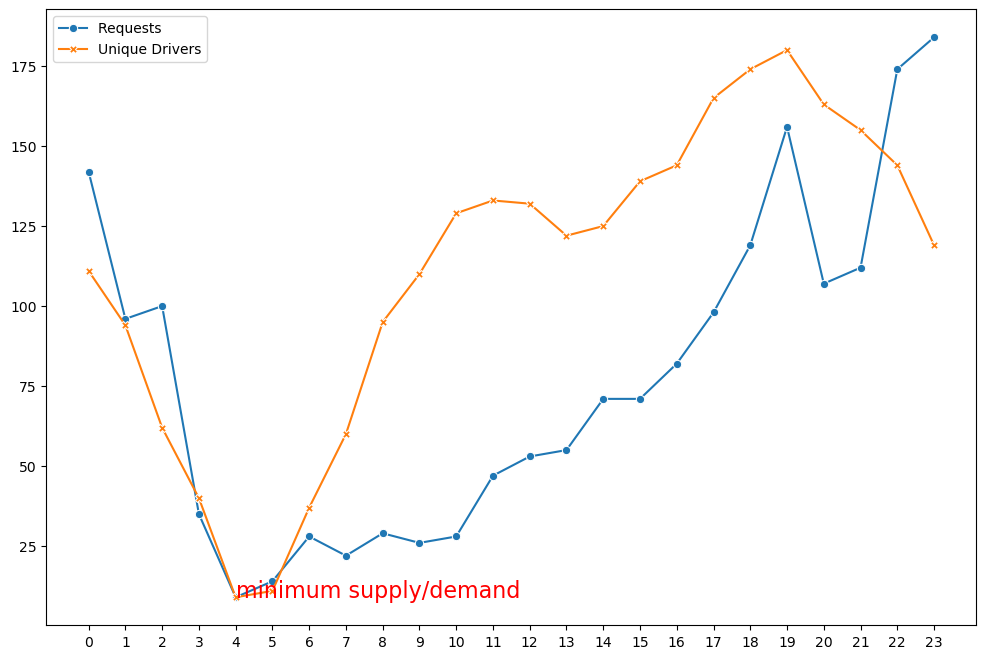

In [144]:
# plot and annotate the minimum hour
df_agg_time = df.groupby('Time (Local)').sum().reset_index()
min_point_value = df_agg_time['Requests '][min_point[0]]
plt.figure(figsize=(12,8))
fig = sns.lineplot(data=df_agg_time[['Requests ', 'Unique Drivers']], markers=True, dashes=False)
fig.set_xticks(df_agg_time['Time (Local)'])
plt.annotate('minimum supply/demand', xy=(min_point[0], min_point_value), color='r', fontsize=16)
plt.show()

Thank you ! 